# Data Analysis- Investigating Titanic Dataset

<b>Questions</b>
<ul>
   <li>Does the Fare indicate the if an individual survived or not?</li>
   <li>Does age indicate if an individual survived or not?</li>
   <li>Does gender indicate if an individual survived or not?</li>
</ul>

<b>Data Conversion is required.</b>
<ul>
   <li>Convert Sex for males and females to numerical data (0,1).</li>
</ul>

In [2]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [182]:
#import Titanic CSV file to a DataFrame
titanic_file = 'C:\\Users\\edimarco\\DataAnalysisProject\\titanic_data.csv'
titanic_df = pd.read_csv(titanic_file)

In [183]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 5: When comparing the gender (sex) to the survival rate I need to convert the sex to numerical data instead of text. I am converting the males to 1 and females to 2.

In [184]:
### Convert sex for Males to 0 and females to 1
def convert_gender(gender):
    '''
    Fill in this function to convert the given Series of string genders
    to numerical genders. The output is a new series.
    
    The conversion rule is:
        male   -> 0
        female -> 1
    '''
    
    if gender=='male':
        return 0
    elif gender=='female':
        return 1

In [185]:
titanic_series = titanic_df['Sex'].apply(convert_gender)

In [186]:
titanic_df['Sex'] = titanic_series

In [187]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Step 2 : Group by the fare paid to see if it has any correlation to whether or not the individual survived or not.

In [188]:
### Group the titanic data by fare paid (group by excludes NAN)
### create a plot of fare and the survival rate
### Calculate Pearson's R for the relationship between survival rate and fare paid.

titanic_grouped_data_fare = titanic_df.groupby(['Fare'],as_index=False).mean()

In [189]:
###View the first 5 Records

titanic_grouped_data_fare.head()

,Fare,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0000,516.4,0.066667,1.933333,0.0,35.142857,0.0,0.0
1,4.0125,379.0,0.000000,3.000000,0.0,20.000000,0.0,0.0
2,5.0000,873.0,0.000000,1.000000,0.0,33.000000,0.0,0.0
3,6.2375,327.0,0.000000,3.000000,0.0,61.000000,0.0,0.0
4,6.4375,844.0,0.000000,3.000000,0.0,34.500000,0.0,0.0


Step 3 Create a scatter plot to see if there is any clear correlation.

In [190]:
###Importing libraries and attributes for plotting
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


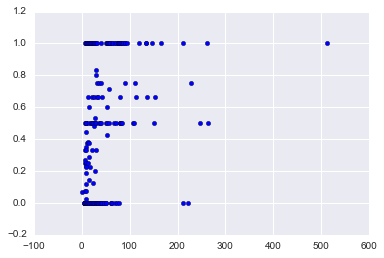

In [191]:
### Create Scatter Plot with Fare on X axis and survival rate on the Y axis.

plt.scatter(titanic_grouped_data_fare['Fare'], titanic_grouped_data_fare['Survived'])

Step 4 : Calculate Pearson's R

In [192]:
def standardize(df):
    '''
    standardize each column of the given
    DataFrame. Convert each value to the
    number of standard deviations it is above or below the mean.
    
    This function uses vectorized operations instead of using apply
    '''

    return (df - df.mean())/df.std(ddof=0)

In [193]:
def correlation(x, y):
    '''
    Compute the correlation between the two
    input variables. Each input is a Pandas Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    '''
    correl_var = (standardize(x) * standardize(y)).mean()
    
    return correl_var

In [194]:
###Creating Variables and Computing Pearson's R
###Output is the Pearson's R Calculation

fare = titanic_df['Fare']
survived = titanic_df['Survived']

print correlation(fare, survived)

0.257306522385


About 26% of the variation in the survival rate can be described by the fare the individual paid. 
Keep in mind that no machine learning algorithms have been applied to more correctly calculate the correlation.

Step 5 : Repeat Steps 2,3,4 for comparing age and survival rate.

Step 2 : Group by age to see if it has any correlation to whether or not the individual survived or not.

In [195]:
### Group the titanic data by age (group by excludes NAN)
### create a plot of age and the survival rate
### Calculate Pearson's R for the relationship between survival rate and age.

titanic_grouped_data_age = titanic_df.groupby(['Age'],as_index=False).mean()

In [196]:
###View the first 5 Records

titanic_grouped_data_age.head()

,Age,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0.42,804.0,1.0,3.0,0.0,0.0,1.0,8.5167
1,0.67,756.0,1.0,2.0,0.0,1.0,1.0,14.5000
2,0.75,557.5,1.0,3.0,1.0,2.0,1.0,19.2583
3,0.83,455.5,1.0,2.0,0.0,0.5,1.5,23.8750
4,0.92,306.0,1.0,1.0,0.0,1.0,2.0,151.5500


Step 2 : Create a scatter plot to see if there is any clear correlation.

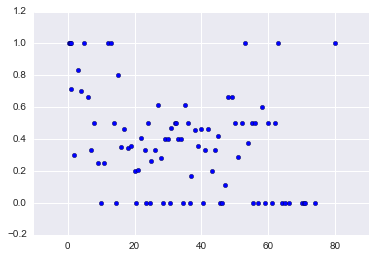

In [197]:
### Create Scatter Plot with Age on X axis and survival rate on the Y axis.

plt.scatter(titanic_grouped_data_age['Age'], titanic_grouped_data_age['Survived'])

Step 3 : Calculate Pearson's R

In [198]:
age = titanic_df['Age']
survived = titanic_df['Survived']

print correlation(age, survived)

-0.0779826784139


The Pearson's R Calculation can range from -1 to 1. In this case there is a slight negative correlation between age and the survival rate. The r calculation is only at -7% so it is a very low correlation. When learning about machine learning it will be interesting to see how combining the age, gender and fare in one machine learning algorithm to see how the relationship changes when using more than one variable.

Step 5 : Repeat Steps 2,3,4 for comparing gender and survival rate.

Step 2 : Group by Sex to see if it has any correlation to whether or not the individual survived or not.

In [201]:
### Group the titanic data by Sex (group by excludes NAN)
### create a plot of Sex and the survival rate
### Calculate Pearson's R for the relationship between survival rate and Sex.

titanic_grouped_data_sex = titanic_df.groupby(['Sex'],as_index=False).mean()

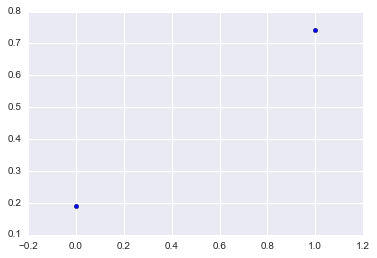

In [202]:
### Create Scatter Plot with Age on X axis and survival rate on the Y axis.

plt.scatter(titanic_grouped_data_sex['Sex'], titanic_grouped_data_sex['Survived'])

Step 3 : Calculate Pearson's R

In [203]:
sex = titanic_df['Sex']
survived = titanic_df['Survived']

print correlation(sex, survived)

0.543351380658


About 54% of the variability in the survival rate can be described by the sex the individual. 
Keep in mind that no machine learning algorithms have been applied to more correctly calculate the correlation. It is very surprising to see such a hugh difference in the survival rate of men versus the survival rate of women. Based on the scatter plot it appears about 20% of men survived while about 75% of women survived.